# Convolution Neural Network: CIFAR-10 Dataset
## This homework is done in partnership by:
### Devansh Batra (batra17@purdue.edu)
### Lakshay Vohra (lvohra@purdue.edu)

This notebook uses the classic [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which is a labeled subset of the 80 million tiny images dataset. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


## The CIFAR-10 dataset

### Get the data
CIFAR-10 dataset is provided by Keras directly. The following codes show how to load it. 

In [26]:
# the data, shuffled and split between train and test sets 
from tensorflow.keras.datasets import cifar10
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = cifar10.load_data()

### Visualize data

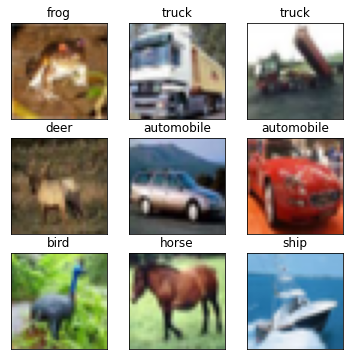

In [27]:
label_lst = ["airplane", "automobile", "bird", "cat", "deer",
            "dog", "frog", "horse", "ship", "truck"]
fig = plt.figure(figsize=(6, 6))
col = 3
row = 3
for i in range(col*row):
    label = label_lst[y_train_pre[i][0]]
    img = X_train_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('{}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

### convert class vectors to binary class matrices
convert class label to one-hot coding

In [28]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 9 samples are 6, 9,9,4,1,1,2,7,8
y_train[:9,] 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

### Normalize the features

In [29]:
img_rows, img_cols = 32, 32
X_train = X_train_pre.astype('float32') 
X_test = X_test_pre.astype('float32')
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_test,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#X_train /= 255. 
#X_test /= 255.

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])
train_idx = int(X_train.shape[0]*validation_split)
X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (40000, 32, 32, 3)
40000 train samples, 10000 validation samples, 10000 test samples


## The model

### Inspect the model

Use the `.summary` method to print a simple description of the model

### Build the model

please fill

In [47]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)))                                       
CNNmodel.add(Dropout(0.2))                                      
CNNmodel.add(Conv2D(32, (3, 3), activation='relu'))             
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))                    
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))             
CNNmodel.add(Dropout(0.2))                                      
CNNmodel.add(Conv2D(64, (3, 3), activation='relu',))            
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))                    
CNNmodel.add(Conv2D(128, (3, 3), activation='relu',))               
CNNmodel.add(Dropout(0.2))                                          
CNNmodel.add(Conv2D(128, (3, 3), activation='relu',))               
CNNmodel.add(Flatten())                                         
CNNmodel.add(Dense(256, activation='relu'))                     
CNNmodel.add(Dropout(0.2))                                      
CNNmodel.add(Dense(10, activation='softmax'))                   

CNNmodel.compile(loss=keras.losses.categorical_crossentropy,
optimizer='Adam',
metrics=['accuracy'])
## model fit
CNNmodel.fit(X_train, y_train,batch_size=500, epochs = 20, validation_data=(X_val, y_val))
##model performance
performance = CNNmodel.evaluate(X_test, y_test)
print('Test accuracy:', performance[1])


Epoch 1/20
80/80 [==============================] - 75s 918ms/step - loss: 1.9074 - accuracy: 0.2904 - val_loss: 1.6990 - val_accuracy: 0.3905
Epoch 2/20
80/80 [==============================] - 72s 902ms/step - loss: 1.5288 - accuracy: 0.4339 - val_loss: 1.4313 - val_accuracy: 0.4871
Epoch 3/20
80/80 [==============================] - 72s 899ms/step - loss: 1.3628 - accuracy: 0.5074 - val_loss: 1.2498 - val_accuracy: 0.5563
Epoch 4/20
80/80 [==============================] - 74s 929ms/step - loss: 1.2324 - accuracy: 0.5557 - val_loss: 1.2155 - val_accuracy: 0.5733
Epoch 5/20
80/80 [==============================] - 73s 914ms/step - loss: 1.1476 - accuracy: 0.5921 - val_loss: 1.1279 - val_accuracy: 0.5974
Epoch 6/20
80/80 [==============================] - 75s 938ms/step - loss: 1.0588 - accuracy: 0.6227 - val_loss: 1.0406 - val_accuracy: 0.6305
Epoch 7/20
80/80 [==============================] - 73s 913ms/step - loss: 0.9999 - accuracy: 0.6439 - val_loss: 0.9695 - val_accuracy: 0.6619

In [48]:
CNNmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_11 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                      

### Data Augmentation

In [49]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

### Train the model

In [50]:
optimizer = keras.optimizers.Adam(0.0005,decay=1e-6)
CNNmodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = CNNmodel.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH),
                              steps_per_epoch=X_train.shape[0] // BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

<ipython-input-51-2587687eb72b>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = CNNmodel.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH),


Epoch 1/100
625/625 [==============================] - 7434s 12s/step - loss: 0.9073 - accuracy: 0.6816 - val_loss: 0.7834 - val_accuracy: 0.7340
Epoch 2/100
625/625 [==============================] - 81s 129ms/step - loss: 0.8705 - accuracy: 0.6951 - val_loss: 0.7594 - val_accuracy: 0.7381
Epoch 3/100
625/625 [==============================] - 75s 120ms/step - loss: 0.8409 - accuracy: 0.7060 - val_loss: 0.7024 - val_accuracy: 0.7510
Epoch 4/100
625/625 [==============================] - 73s 117ms/step - loss: 0.8206 - accuracy: 0.7139 - val_loss: 0.6800 - val_accuracy: 0.7640
Epoch 5/100
625/625 [==============================] - 79s 126ms/step - loss: 0.8055 - accuracy: 0.7190 - val_loss: 0.7370 - val_accuracy: 0.7472
Epoch 6/100
625/625 [==============================] - 81s 130ms/step - loss: 0.7922 - accuracy: 0.7204 - val_loss: 0.6941 - val_accuracy: 0.7637


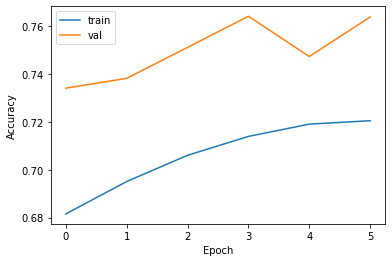

In [52]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [53]:
_, acc = CNNmodel.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 75.65%
